# Project I - Chem 273
## Finite Differences, Random Numbers and Simulation

**1) Motivation**

In the previous modules you have learned how to generate random numbers, how to perform integration and differentiation numerically and also how to perform useful matrix operations.<bf>
You are ready now to run our first project that requires all of your newly gained knowledge!<br> 
In this assignment, we want you to practice how to model differential operators like the Laplace operator numerically using finite differences in order to simulate a diffusion model that explains the formation of fur pattern. 

<br>

**2) Preparation**

Compile and run the code *Diffusion2D.py* from the lecture in module 4.<br>
Try to understand what the code does conceptionally!

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
class Diffusion2D():
    
    def __init__(self):
        
        #defining grids
        Lx = 100
        Ly = 100
        Lt = 2500
                
        C = 3*np.ones((Lx,Ly,Lt))
      

        #adding up to 12 "seeds" at random locations
        N = round(12*np.random.rand())
        for n in range(N):
            C[int(Lx*np.random.rand()), int(Ly*np.random.rand()),0] = 500
            
            
        self.C = C
        
        self.Lx = Lx
        self.Ly = Ly
        self.Lt = Lt
        
        
    def RunSimulation(self, D = 0.08):
        
        C = self.C
        
       
        sns.heatmap(C[:,:,0], cbar = True, cmap="Blues",
                    xticklabels = False, yticklabels = False)
        plt.show()
        


        for k in range(1, self.Lt-1):
            for j in range(self.Ly):
        
                jrun_up   = j
                jrun_down = j
         
                #cyclic BCs----------------------------------------------------
                if j+1> self.Ly-1:
                    jrun_up = -1
                
                if j-1 == -1:
                    jrun_down = self.Ly - 1
                #--------------------------------------------------------------
        
                for i in range(self.Lx):
                    
                    irun_up   =i
                    irun_down =i
                
                    #cyclic BCs----------------------------------------------------
                    if i+1>self.Lx-1:
                        irun_up = -1
                        
                    if i-1 == -1:
                        irun_down = self.Lx - 1
                    #--------------------------------------------------------------
                                                                                                                                                                                                   
                    C[i,j,k] = 2*D*(C[irun_up + 1, j,   k - 1] + C[irun_down - 1, j, k-1] +\
                                    C[i, jrun_up + 1,   k - 1] - 4*C[i, j, k-1] +\
                                    C[i, jrun_down - 1, k - 1]) +\
                                    C[i, j, k-1] 
 

            if not k % 250:
                
                sns.heatmap(C[:,:,k], cbar = True, cmap = "Blues",
                            xticklabels = False, yticklabels = False)
                plt.show()

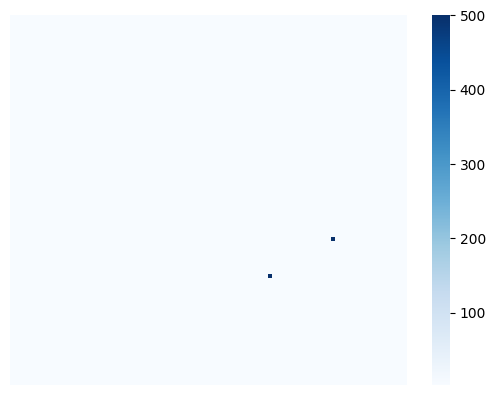

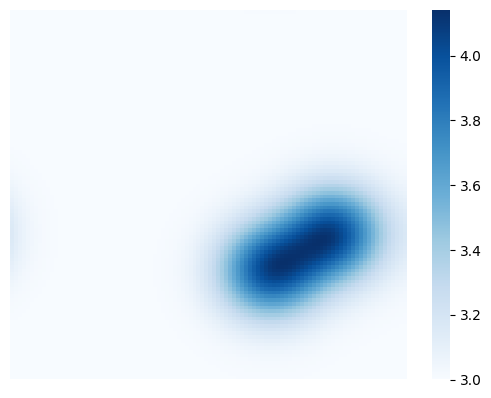

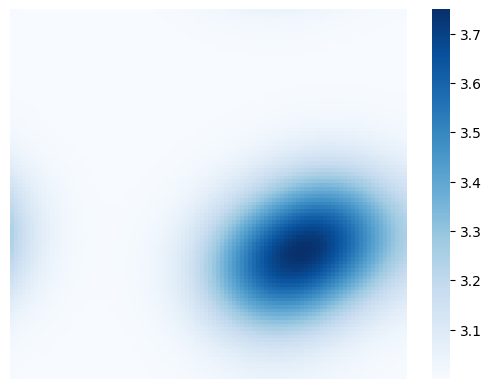

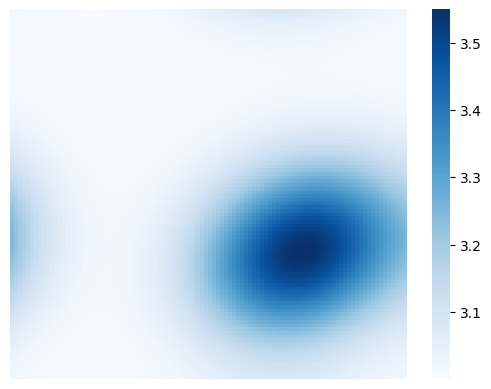

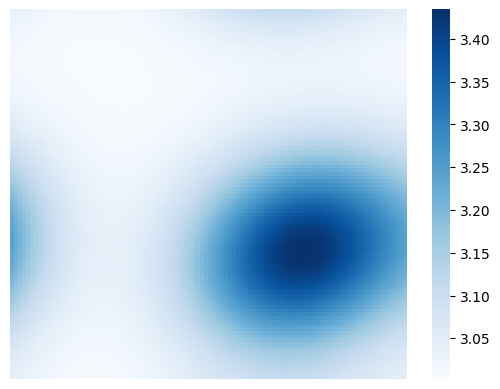

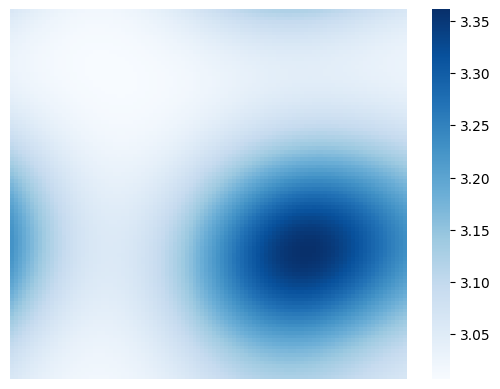

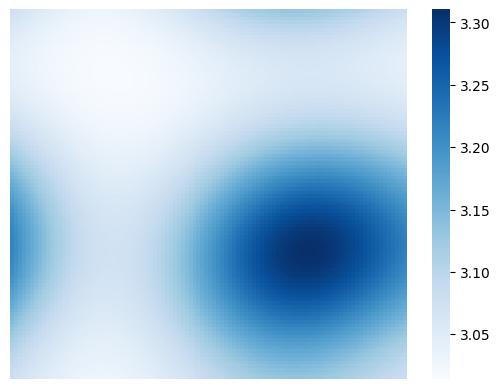

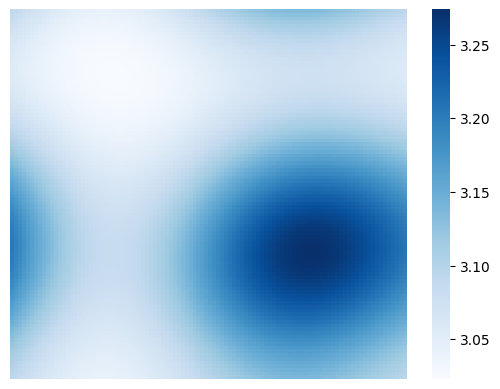

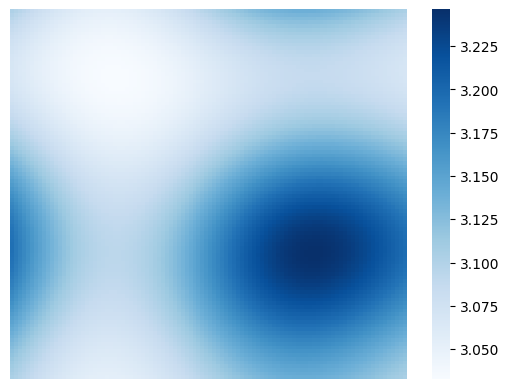

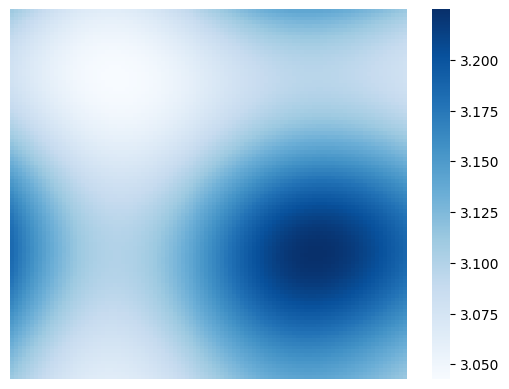

In [40]:
D = Diffusion2D()
D.RunSimulation() 

The **__init__** method initializes the class *Diffusion2D*. It essentially sets up the matrices needed for the simulation. Once *Diffusion2D* has been initialized you can run the actual simulation. The structure is similar to what you have might seen in python already, when you fit data to a model. You first initialize the model:<br>
<br>
My_Model = LinearFit(some fit parameter)<br>
<br>
and then run the actual fit<br>
<br>
Result   = My_Model.fit(MyData)<br>
<br>
<br>
In order to be able to use the variables which have been initialized in the **__init__** method in the **RunSimulation** method, we need to make them accesible via *self*.<br>
Check out:

In [ ]:
dir(D)

In [ ]:
print(D.Lx)
print(D.Lt)

<br>

**3) Exercise**

We now want to run a more complex model that describes how fur pattern or skin pattern on vertebrates emerge due to diffusion reactions. These equations contain a diffusion term $\frac{\partial }{\partial t}c = \Delta c$ and terms that describe the chemical reaction between different chemical compounts.<br>
A particularly interesting paper is the work of *A. J. Koch and H. Meinhardt Biological pattern formation: from basic mechanisms to
complex structures, Rev. Mod. Phys. 66, 1481, 1994* that also shows the numerical details about the simulation.<br>

As a first step, take the code from above and replace the lines which are refering to $C(x,y,t)$ by the following equations:<br>
<br>
$\frac{\partial}{\partial t}a = D_a\, \Delta a + \rho_a \left[\frac{s\,a^2}{1+ \kappa_a\,a^2}   - a\right]$<br>
<br>
$\frac{\partial}{\partial t}s = D_s\, \Delta s + \frac{\sigma_s}{1+ \kappa_s\,y} - \frac{\rho_s\, s\,a^2}{1+ \kappa_a\,a^2} - \mu_s\,s $<br>
<br>
$\frac{\partial}{\partial t}y = \frac{\rho_y\, y^2}{1+ \kappa_y\,y^2} - \mu_y\,y - \sigma_y\,a$<br>

Next, initialize the matrices for *a*, *s* and *y* in the **__init__** as follows:

In [ ]:
A = np.zeros((Lx,Ly,Lt))
S = 3*np.ones((Lx,Ly,Lt))
Y = np.zeros((Lx,Ly,Lt))

and plant "seeds" for the diffusion process for *A*.<br>
<br>
Finally, implement the set of constants in the **__init__** needed for generating **cheetah fur**:

In [ ]:
self.Da     = 0.01
self.Ds     = 0.1
self.rhoa   = 0.05
self.rhos   = 0.0035
self.rhoy   = 0.03
self.mus    = 0.003
self.muy    = 0.003
self.sigs   = 0.0075
self.sigy   = 0.00007
self.ka     = 0.5
self.ks     = 0.3
self.ky     = 22

After running the simulation, you should expect to see the following results:

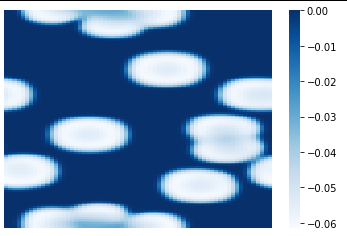
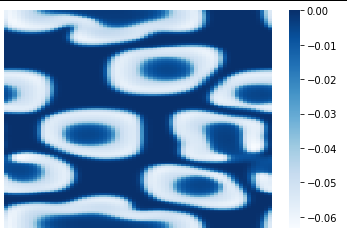
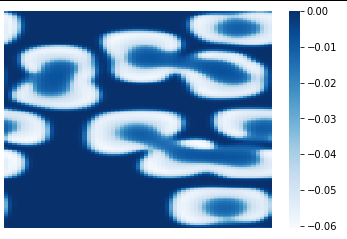

Note: you might need to experiment with the initial conditions for *S* and *A*:<br> 
 - Choose values between 2 and 5.<br>
 - add different noise levels, like e.g.<br>

In [ ]:
A[:,:,0] = 0.01*np.random.rand(Lx,Ly)
S[:,:,0] += 0.01*np.random.rand(Lx,Ly)
Y[:,:,0] = 0.01*np.random.rand(Lx,Ly)

How do the pattern change?

**Solution**

Your code should look like this:

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
class FurPattern():
    
    def __init__(self):
        
        #defining densities and diffusion coefficients
        
      
        self.Da     = 0.01
        self.Ds     = 0.1
        self.rhoa   = 0.05
        self.rhos   = 0.0035
        self.rhoy   = 0.03
        self.mus    = 0.003
        self.muy    = 0.003
        self.sigs   = 0.0075
        self.sigy   = 0.00007
        self.ka     = 0.5
        self.ks     = 0.3
        self.ky     = 22
        
        initS       = 2.5
        initSeed    = 2
        
        #defining grids
        Lx = 120
        Ly = 65
        Lt = 5000
        
        A = np.zeros((Lx,Ly,Lt))
        S = initS*np.ones((Lx,Ly,Lt))
        Y = np.zeros((Lx,Ly,Lt))

        
        
        #adding up to 12 "seeds" at random locations
        N = round(12*np.random.rand())
        for n in range(N):
            A[int(Lx*np.random.rand()), int(Ly*np.random.rand()),0] = initSeed
            
            
        self.A = A
        self.S = S
        self.Y = Y
        
        self.Lx = Lx
        self.Ly = Ly
        self.Lt = Lt
        
        
    def RunSimulation(self, N: int = 10):
        
        
        A = self.A
        S = self.S
        Y = self.Y
        
        sns.heatmap(Y[:,:,0], cbar = True, cmap = 'Blues',
                    xticklabels = False, yticklabels = False)
        plt.show()
        


        for k in range(1, self.Lt-1):
            for j in range(self.Ly):
        
                jrun_up   = j
                jrun_down = j
         
                #cyclic BCs----------------------------------------------------
                if j+1> self.Ly-1:
                    jrun_up = -1
                
                if j-1 == -1:
                    jrun_down = self.Ly - 1
                #--------------------------------------------------------------
        
                for i in range(self.Lx):
                    
                    irun_up   =i
                    irun_down =i
                
                    #cyclic BCs----------------------------------------------------
                    if i+1>self.Lx-1:
                        irun_up = -1
                        
                    if i-1 == -1:
                        irun_down = self.Lx - 1
                    #--------------------------------------------------------------
                    
                                                                                                                                                                                                   
                    A[i,j,k] = self.Da*(A[irun_up +1,j,k-1] + A[irun_down-1,j,k-1] +\
                                        A[i,jrun_up+1,k-1] - 4*A[i,j,k-1] +\
                                        A[i,jrun_down-1,k-1]) +\
                                        A[i,j,k-1] +\
                               self.rhoa*((A[i,j,k-1]**2)*S[i,j,k-1]/(1+self.ka*A[i,j,k-1]**2) - A[i,j,k-1])
                                           
                    S[i,j,k] = self.Ds*(S[irun_up+1,j,k-1] + S[irun_down-1,j,k-1] +\
                                        S[i,jrun_up+1,k-1] - 4*S[i,j,k-1] +\
                                        S[i,jrun_down-1,k-1]) +\
                                        S[i,j,k-1] +\
                               self.sigs/(1+self.ks*Y[i,j,k-1]) -\
                               self.rhos*S[i,j,k-1]*(A[i,j,k-1]**2)/(1+self.ka*A[i,j,k-1]**2) -\
                               self.mus*S[i,j,k-1]
                    
                    Y[i,j,k] = self.rhoy*(Y[i,j,k-1]**2)/(1+self.ky*Y[i,j,k-1]**2) +\
                               Y[i,j,k-1] -\
                               self.muy*Y[i,j,k-1] - self.sigy*A[i,j,k-1]

            if not k % 250:
                
                sns.heatmap(Y[:,:,k], cbar = True, cmap = 'Blues',
                            xticklabels = False, yticklabels = False)
                plt.show()

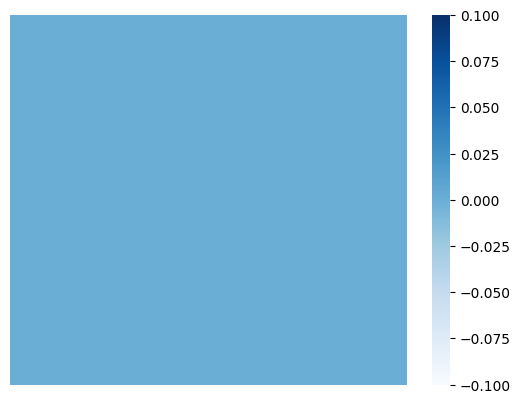

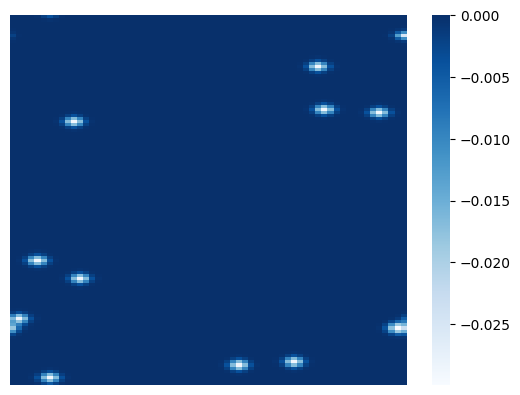

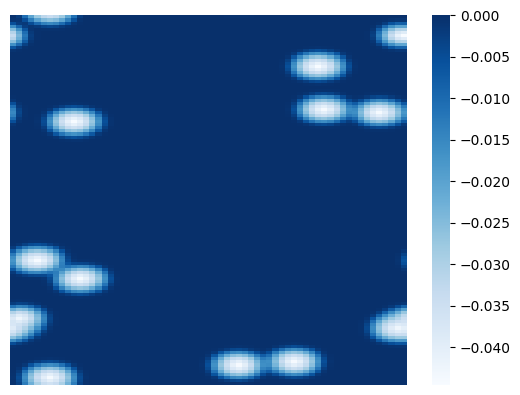

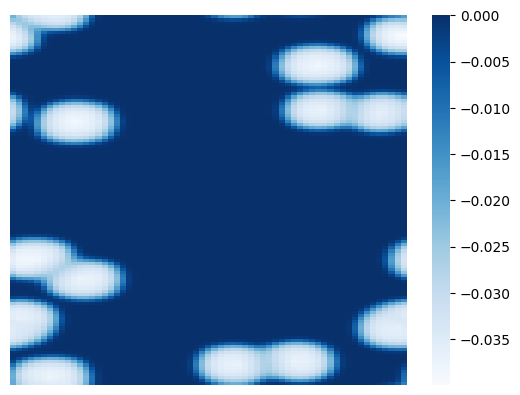

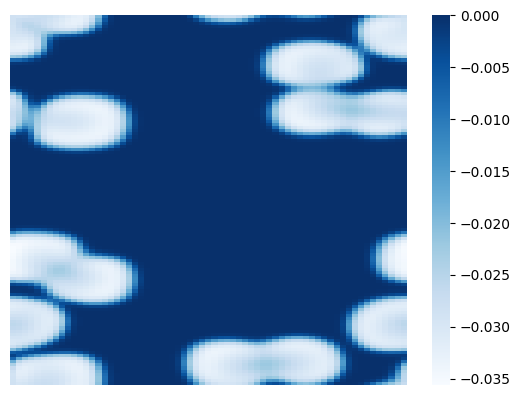

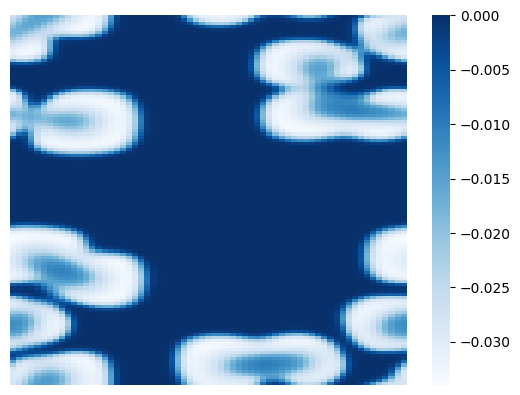

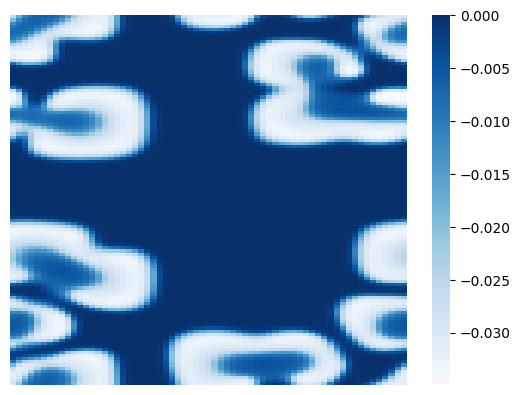

KeyboardInterrupt: 

In [7]:
F = FurPattern()
F.RunSimulation()